In [ ]:
! lamin load scprint

💡 found cached instance metadata: /home/ml4ig1/.lamin/instance--jkobject--scprint.env
💡 loaded instance: jkobject/scprint


In [ ]:
from lightning.pytorch import Trainer, seed_everything
from lightning.pytorch.callbacks import ModelCheckpoint, StochasticWeightAveraging, EarlyStopping, LearningRateMonitor, LearningRateFinder

seed_everything(42, workers=True)

from scprint import scPrint
from scprint.trainer import TrainingMode
from scdataloader import DataModule

import torch
torch.set_float32_matmul_precision('medium')

%load_ext autoreload
%autoreload 2

Global seed set to 42


💡 lamindb instance: jkobject/scprint


In [ ]:
# TODO: drop tissue & dev stage until part or is taken in account

hierarchical_labels = [
    "cell_type_ontology_term_id", #1
    # "tissue_ontology_term_id",
    "disease_ontology_term_id", # 2
#    "development_stage_ontology_term_id",
    "assay_ontology_term_id", #3
    'self_reported_ethnicity_ontology_term_id', #4
]
labels_to_pred = hierarchical_labels+[
    'sex_ontology_term_id', #5
    "organism_ontology_term_id", #6
]
all_labels = labels_to_pred+[
    #'dataset_id',
    'cell_culture',
    "heat_diff",
    "total_counts",
    "nnz",
    "dpt_group",
]

gene_emb = '../data/temp/embeddings.parquet'
d_model=128

In [ ]:
# we might want not to order the genes by expression (or do it?)
# we might want to not introduce zeros and 

In [ ]:
datamodule = DataModule(
    collection_name="preprocessed dataset",
    gene_embeddings=gene_emb,
    all_labels=all_labels,
    hierarchical_labels=hierarchical_labels,
    organisms=["NCBITaxon:9606"],
    how="most expr",
    max_len=1000,
    add_zero_genes=100,
    label_to_weight=labels_to_pred,
    label_to_pred=labels_to_pred,
    batch_size=64,
    num_workers=16,
    validation_split=0.1,
    test_split=0.1)
testfiles = datamodule.setup()

TypeError: MappedDataset.__init__() got an unexpected keyword argument 'join_vars'

In [ ]:
import bionty as bt
import lamindb as ln

In [ ]:
from scdataloader.utils import get_ancestry_mapping, load_genes


In [ ]:
df = bt.Tissue.filter().df()

In [ ]:
parentdf = bt.Tissue.filter().df(include=["parents__ontology_id"]).set_index("ontology_id")

In [ ]:
ids

ontology_id
UBERON:8440012    [UBERON:0009663]
Name: parents__ontology_id, dtype: object

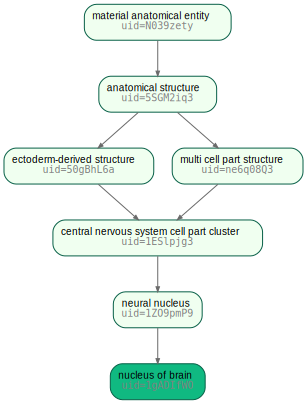

In [ ]:
bt.Tissue.search("nucleus of brain", field="name",return_queryset=True).first().view_parents()

In [ ]:
bt.Tissue.public().

PublicOntology
Entity: Tissue
Organism: all
Source: uberon, 2023-09-05
#terms: 15539

📖 .df(): ontology reference table
🔎 .lookup(): autocompletion of terms
🎯 .search(): free text search of terms
✅ .validate(): strictly validate values
🧐 .inspect(): full inspection of values
👽 .standardize(): convert to standardized names
🪜 .diff(): difference between two versions
🔗 .to_pronto(): Pronto.Ontology object

In [ ]:
i=0
name = "cerebral nuclei"
while i == 0:
    print(name)
    ids = parentdf[parentdf.name==name].parents__ontology_id
    name = [df.loc[d].name for d in ids]

cerebral nuclei


KeyError: "None of [Index(['UBERON:0009663'], dtype='object', name='id')] are in the [index]"

In [ ]:
groupings, _, lclass = get_ancestry_mapping(cats, parentdf)

In [ ]:
['spinal cord', 'vermiform appendix', 'kidney', 'blood', 'caudal ganglionic eminence', 'skin of body', 'mesenteric lymph node', 'hippocampal formation', 'heart', 'uterine cervix', 'coronal suture', 'eye', 'meningeal dura mater', 'descending colon', 'fovea centralis', 'temporal lobe', 'unknown', 'ascending colon', 'jejunum', 'thyroid gland', 'lamina propria', 'mesonephros', 'venous blood', 'jejunal epithelium', 'cerebral cortex', 'chorionic villus', 'primary motor cortex', 'lung', 'muscle organ', 'thalamic complex', 'cortex of kidney', 'peripheral region of retina', 'bronchopulmonary lymph node', 'thymus', 'lung parenchyma', 'skeletal muscle tissue', 'prostate gland', 'brain meninx', 'esophagus', 'dura mater', 'ileal epithelium', 'ureter', 'fallopian tube', 'spleen', 'breast', 'entorhinal cortex', 'liver', 'primary visual cortex', 'adipose tissue', 'gonad', 'stomach', 'rib', 'caecum', 'pancreas', 'anterior cingulate cortex', 'bladder organ', 'retina', 'small intestine', 'vault of skull', 'duodenum', 'heart left ventricle', 'artery', 'adrenal gland', 'alveolus of lung', 'bone marrow', 'uterus', 'peripheral lymph node', 'renal medulla', 'intestine', 'myelencephalon', 'islet of Langerhans', 'gallbladder', 'lamina propria of small intestine', 'brain', 'zone of skin', 'trachea', 'respiratory airway', 'renal papilla', 'orbitofrontal cortex', 'hypothalamus', 'sigmoid colon', 'placenta', 'ileum', 'medial ganglionic eminence', 'umbilical cord blood', 'ovary', 'pleura', 'transverse colon', 'subdural space', 'rectum', 'lower lobe of left lung', 'cerebellum', 'thoracic lymph node', 'cerebral nuclei', 'parietal lobe', 'omentum', 'testis']
